### Sprawozdanie - Generatory Liczb Losowych
<div style="text-align: right"> Wojciech Kosztyła </div>


In [1]:
import random
import numpy as np
import random
import scipy
import scipy.stats
from math import *
import math
import matplotlib.pyplot as plt

#### Zadanie 1 - Testowanie generatorów liczb losowych

Dla obydwu generatorów liczb losowych (Mersenne Twister oraz PCG64) oraz dla $n=10,1000,5000$ wylosuj $n$ liczb losowych pochodzących z rozkładu jednostajnego i wykonaj następujące kroki.
1. Zwizualizuj na wykresie rozkład liczb w 10 równych przedziałach.
2. Sprawdź, dla ilu liczb spełniona jest nierówność $x_{i} < x_{i+1}$. Ile powinno ich być dla idealnego generatora?
3. Zaimplementuj jeden z testów zdefiniowanych w rozdziale drugim artykułu [(link)](https://csrc.nist.gov/publications/detail/sp/800-22/rev-1a/final) i wykorzystaj go do sprawdzenia wylosowanego ciągu liczb.

Czy widać różnice pomiędzy generatorami? Czy wraz z rosnącym $n$ coś się zmienia?

Zaimplementowalem tworzenie histogramu na te dwa sposoby.

Wybrany przeze mnie test, to "Frequency (Monobit) Test", przy czym korzystam z przybliżenia wylosowanej liczby z zakresu [0,1) do bita.

In [2]:
def histogram_MarsenneTwister(n, ilosc_przedzialow):
    histogram = []
    for _ in range(ilosc_przedzialow):
        histogram.append(0)

    for _ in range(n):
        wylosowana_wartosc = random.uniform(0,1)

        for i in range(ilosc_przedzialow):
            if wylosowana_wartosc >= i/ilosc_przedzialow and wylosowana_wartosc < (i+1)/ilosc_przedzialow:
                histogram[i] += 1
                break

    return histogram

def histogram_MCG64(n, ilosc_przedzialow):
    histogram = []
    for _ in range(ilosc_przedzialow):
        histogram.append(0)

    for _ in range(n):
        wylosowana_wartosc = np.random.uniform()

        for i in range(ilosc_przedzialow):
            if wylosowana_wartosc >= i/ilosc_przedzialow and wylosowana_wartosc < (i+1)/ilosc_przedzialow:
                histogram[i] += 1
                break

    return histogram

print(" MarsenneTwister:\n Wartości poszczególnych 'kolumn': {} \n".format(histogram_MarsenneTwister(5000, 10)))
print(" MCG64:\n Wartości poszczególnych 'kolumn': {} \n".format(histogram_MCG64(5000, 10)))

 MarsenneTwister:
 Wartości poszczególnych 'kolumn': [463, 512, 497, 487, 510, 524, 512, 510, 483, 502] 

 MCG64:
 Wartości poszczególnych 'kolumn': [548, 480, 496, 487, 472, 506, 515, 479, 521, 496] 



Ta wersja implementacji wykonywała pierwszą, a zarazem najistotniejszą część zadania - generowała histogram (jeszcze nie wizualnie) z losowych wartości.

Jesteśmy też w stanie stwierdzić, czy jest to rzeczywiście rozkład jednostajny - na to wygląda, gdyż nie ma żadnych "rzucających się w oczy" "górek".

Następnie rozszerzyłem te implementacje o podpunkty 2.(zliczenie wystąpień nierówności) i 3.(implementacja jednego z testów).

In [3]:
def histogram_MarsenneTwister(n, ilosc_przedzialow):
    histogram = []
    for _ in range(ilosc_przedzialow):
        histogram.append(0)

    licznik_warunku = 0     # do podpunktu 2
    ostatnia_wartosc = 1000

    temp_suma = 0

    for _ in range(n):
        wylosowana_wartosc = random.uniform(0,1)
        if wylosowana_wartosc > ostatnia_wartosc:
            licznik_warunku+=1

        if wylosowana_wartosc>=0.5:
            temp_suma+=1
        else:
            temp_suma-=1

        for i in range(ilosc_przedzialow):
            if wylosowana_wartosc >= i/ilosc_przedzialow and wylosowana_wartosc < (i+1)/ilosc_przedzialow:
                histogram[i] += 1
                break
        ostatnia_wartosc = wylosowana_wartosc

    return histogram, licznik_warunku, erfc(abs(temp_suma)/sqrt(2*n))

def histogram_MCG64(n, ilosc_przedzialow):
    histogram = []
    for _ in range(ilosc_przedzialow):
        histogram.append(0)

    licznik_warunku = 0
    ostatnia_wartosc = 1000

    temp_suma = 0

    for _ in range(n):
        wylosowana_wartosc = np.random.uniform()
        if wylosowana_wartosc > ostatnia_wartosc:
            licznik_warunku+=1

        if wylosowana_wartosc>=0.5:
            temp_suma+=1
        else:
            temp_suma-=1

        for i in range(ilosc_przedzialow):
            if wylosowana_wartosc >= i/ilosc_przedzialow and wylosowana_wartosc < (i+1)/ilosc_przedzialow:
                histogram[i] += 1
                break
        ostatnia_wartosc = wylosowana_wartosc

    return histogram, licznik_warunku, erfc(abs(temp_suma)/sqrt(2*n))


temp_histogram_MarsenneTwister, l, erfc_MarsenneTwister = histogram_MarsenneTwister(5000, 10)
print(" MarsenneTwister:\n Wartości poszczególnych 'kolumn': {} \n Ilosc prawd warunku 2) :{} \t Wynik testu (jeśli >=0.01 to zbiór jest losowy): {}\n".format(temp_histogram_MarsenneTwister, l, erfc_MarsenneTwister))

temp_histogram_MCG64, l, erfc_MCG64 = histogram_MCG64(5000, 10)
print(" MCG64:\n Wartości poszczególnych 'kolumn': {} \n Ilosc prawd warunku 2) :{} \t Wynik testu (jeśli >=0.01 to zbiór jest losowy): {}\n".format(temp_histogram_MCG64, l, erfc_MCG64))

 MarsenneTwister:
 Wartości poszczególnych 'kolumn': [507, 508, 536, 510, 487, 487, 476, 517, 491, 481] 
 Ilosc prawd warunku 2) :2489 	 Wynik testu (jeśli >=0.01 to zbiór jest losowy): 0.17457635035618174

 MCG64:
 Wartości poszczególnych 'kolumn': [507, 462, 491, 492, 512, 507, 508, 495, 530, 496] 
 Ilosc prawd warunku 2) :2503 	 Wynik testu (jeśli >=0.01 to zbiór jest losowy): 0.3085668768612489



Co do podpunktu 2. - nierówność $x_{i} < x_{i+1}$ spełniana jest przez połowę z wylosowanych liczb.

Uzasadnienie można szukać w statystyce - skoro jest to rozkład jednostajny, to prawdopodobieństwo wylosowania po liczbie $x_{i}$ liczby większej jest równe $1 - x_{i}$, a wartość oczekiwana to $0.5$.
Jest to zależność liniowa, więc można prosto przekształcić $average(1 - x_{i}) = 1 - wartość oczekiwana = 1 - 0.5 = 0.5$

"Rzucamy $n$ razy monetą i zliczamy wypadnięcia reszki".

Co do podpunktu 3. - Test sprawdza proporcję zer do jedynek (a w tym przypadku liczb z przedziału $[0,0.5)$ i $[0.5,1)$).

Taka zamiana jest jak najbardziej poprawna, gdyż poprawny generator liczb losowych powinien wylosować taką samą ilość liczb w dwóch przedziałach równej długości.

Wartość "*erfc(abs(temp_suma)/sqrt(2n))*" to tzw. "*P-value*".
Gdyby była ona mała, świadczyłoby to, że "*temp_suma*" wyszła duża, a ta z kolei powinna oscylować blisko 0.

In [4]:
def rysuj_histogram_10czesci(temp_histogram, tytul="Histogram"):
    x = np.linspace(start=0, stop=1, num=10, endpoint=False)
    #plt.bar(x+0.05, height=temp_histogram_MCG64, width=0.1)
    fig1, ax1 = plt.subplots(figsize=(8,4))
    ax1.set_title(tytul)
    ax1.set_xlabel("Wartość losowanych liczb")
    ax1.set_ylabel("Ilość wystąpień")

    ax1.bar(x+0.05, height=temp_histogram[0], width=0.095, label="P-value:" + str(temp_histogram[2]))
    ax1.legend()
    fig1.show()

Funkcja powyżej narysuje żądany histogram, korzystając z matplotlib.pyplot

N = 10


<ipython-input-4-430a5ac38f1d>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


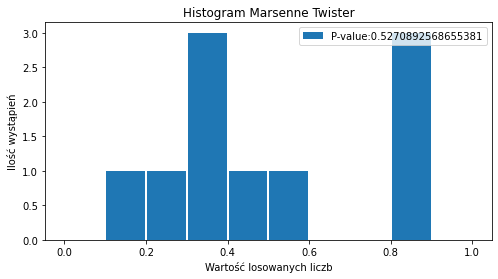

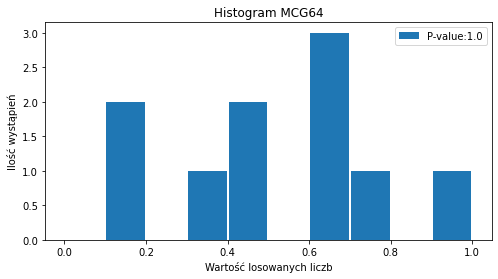

In [5]:
print("N = 10")
rysuj_histogram_10czesci(histogram_MarsenneTwister(10, 10), tytul="Histogram Marsenne Twister")
rysuj_histogram_10czesci(histogram_MCG64(10, 10), tytul="Histogram MCG64")

N = 1000


<ipython-input-4-430a5ac38f1d>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


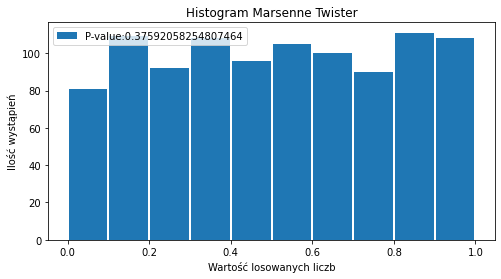

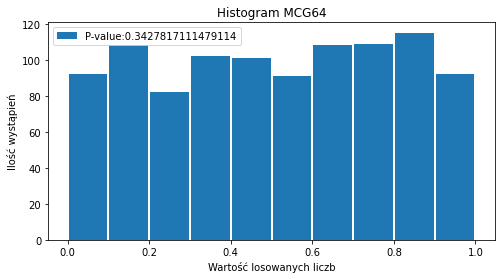

In [6]:
print("N = 1000")
rysuj_histogram_10czesci(histogram_MarsenneTwister(1000, 10), tytul="Histogram Marsenne Twister")
rysuj_histogram_10czesci(histogram_MCG64(1000, 10), tytul="Histogram MCG64")

N = 5000


<ipython-input-4-430a5ac38f1d>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


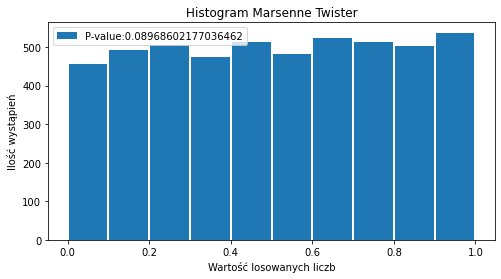

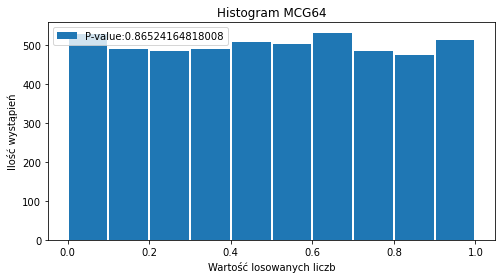

In [7]:
print("N = 5000")
rysuj_histogram_10czesci(histogram_MarsenneTwister(5000, 10), tytul="Histogram Marsenne Twister")
rysuj_histogram_10czesci(histogram_MCG64(5000, 10), tytul="Histogram MCG64")

Ciężko stwierdzić, czy istnieje różnica między tymi generatorami. Przy $N = 5000$ histogram stworzony przy użyciu *MMCG64* wydaje mi się bardziej równomierny, niż ten przy użyciu Marsenne Twister, lecz może też to być najzwyczajniej kwestia obecnego wygenerowania liczb losowych.

Wraz ze wzrostem liczby $n$ zwiększa się "wyrównanie" całego histogramu - dla $n=10$ histogram wcale nie uzwierciedla rozkładu jednostajnego, natomiast $n=5000$ ukazuje już w miarę równy rozkład.

#### Zadanie 2 - Generowanie liczb z rozkładu normalnego

Zaimplementuj generator liczb losowych pochodzących z rozkładu normalnego za pomocą metody Boksa-Mullera i zaprezentuj wyniki dla $n = 10,100,5000$ wygenerowanych liczb.
Funkcja powinna dodatkowo przyjmować wartość oczekiwaną oraz odchylenie standardowe jako parametry.

1. Zwizualizuj na wykresie rozkład liczb w 10 równych przedziałach. Na tym samym wykresie umieść funkcję gęstości prawdopodobieństwa rozkładu normalnego o takich samych parametrach.
2. Wykonaj test statystyczny Shapiro-Wilka, przedstaw uzyskaną $p$-wartość, informację, czy hipoteza zerowa została przyjęta/odrzucona dla $\alpha = 0.05$ i czy w związku z tym są podstawy do stwierdzenia, że liczby pochodzą z rozkładu normalnego.


Rozpocząłem od napisania funkcji generującej liczby przy pomocy transformacji Boksa-Mullera.

In [8]:
def Gaussian_noise(ilosc = 1):

    u_1 = np.random.uniform()
    u_2 = np.random.uniform()

    a = 2.0 * np.pi * u_2
    v = sqrt( -2.0 * np.log(u_1))
    if ilosc==1:
        return v * sin(a)
    else:
        return v * sin(a), v * cos(a)

Jako, że liczba losowa z rozkładu normalnego jest z zakresu $(-\infty, \infty)$ musiałem ograniczyć wyświetlany przedział.

Po paru próbach uznałem, że przedział $[-4, 4]$ powinien być odpowiedni.

In [9]:
def histogram_BoksaMullera(n, ilosc_przedzialow, przedzial_start=-4, przedzial_stop=4):
    histogram = []
    szerokosc = przedzial_stop - przedzial_start
    for _ in range(ilosc_przedzialow):
        histogram.append(0)

    for _ in range(n):
        wylosowana_wartosc = Gaussian_noise()

        for i in range(ilosc_przedzialow):
            if wylosowana_wartosc >= przedzial_start + szerokosc*i/ilosc_przedzialow and wylosowana_wartosc < przedzial_start+ szerokosc*(i+1)/ilosc_przedzialow:
                histogram[i] += 1
                break

    return histogram

Poprzednia funkcja rysująca histogram nie była odpowiednia dla tych danych, więc stworzyłem nową.

<ipython-input-10-a302e5c02fa2>:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


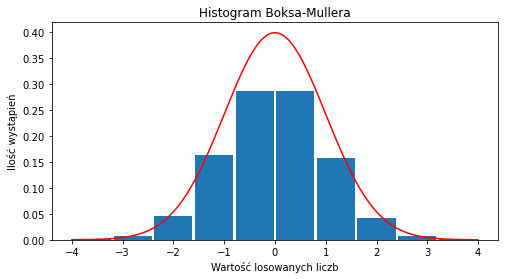

In [10]:
def rysuj_BoksaMullera(n, ilosc_przedzialow=10, przedzial_start=-4, przedzial_stop=4, tytul="Histogram Boksa-Mullera"):
    zwykly_histogram = histogram_BoksaMullera(n, ilosc_przedzialow, przedzial_start=przedzial_start, przedzial_stop=przedzial_stop)

    histogram = []
    for wartosc in zwykly_histogram:        # przeskalowanie na gęstość
        histogram.append(1.0 * wartosc/n)

    x = np.linspace(start=przedzial_start, stop=przedzial_stop, num=ilosc_przedzialow, endpoint=False)
    #plt.bar(x+0.05, height=temp_histogram_MCG64, width=0.1)
    fig1, ax1 = plt.subplots(figsize=(8,4))
    ax1.set_title(tytul)
    ax1.set_xlabel("Wartość losowanych liczb")
    ax1.set_ylabel("Ilość wystąpień")

    x_linii = np.linspace(start=przedzial_start, stop=przedzial_stop, num=1000, endpoint=False)
    y_linii = scipy.stats.norm.pdf(x_linii, 0, 1)

    ax1.plot(x_linii, y_linii, 'r')

    ax1.bar(x + (przedzial_stop - przedzial_start)/(ilosc_przedzialow * 2.0), height=histogram, width=(przedzial_stop-przedzial_start)/(ilosc_przedzialow)-0.05)
    fig1.show()

rysuj_BoksaMullera(5000, 10)

Do przeprowadzenia testu statystycznego Shapiro-Wilka skorzystam z funkcji biblioteki *scipy* - *scipy.stats.shapiro()*.

In [11]:
def test_statystyczny_ShapiroWilka(n, alpha=0.05):
    test_temp = np.array( [Gaussian_noise() for _ in range(n) ])
    W, p_value = scipy.stats.shapiro(test_temp)
    print("\nWartość p_value: {}".format(p_value))
    if p_value > alpha:
        print("Jest to wartość większa niż {}, więc hipoteza zerowa została przyjęta, a ma ona postać 'Próba pochodzi z populacji o rozkładzie normalnym'.".format(alpha))
    else:
        print("Jest to wartość mniejsza niż {}, więc hipoteza zerowa nie została przyjęta, zatem próba nie pochodzi z populacji o rozkładzie normalnym".format(alpha))

test_statystyczny_ShapiroWilka(5000)


Wartość p_value: 0.30268093943595886
Jest to wartość większa niż 0.05, więc hipoteza zerowa została przyjęta, a ma ona postać 'Próba pochodzi z populacji o rozkładzie normalnym'.


Po przeewaluowaniu całego zadania uznałem, że test statystyczny powinienem przeprowadzić na wyświetlanych danych,
dlatego połączę i zmodyfikuję te funkcje.

Znalazłem też w bibliotece funkcję *plt.hist()*, której winienem był użyć od początku, gdyż jest stworzona do histogramów.

Funkcję spajającą wszystko w jedno nazywam *zadanie_BoksaMullera()*.


Wartość p_value: 0.4080597758293152
Jest to wartość większa niż 0.05, więc hipoteza zerowa została przyjęta, a ma ona postać 'Próba pochodzi z populacji o rozkładzie normalnym'.


<ipython-input-12-4d60694879ff>:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


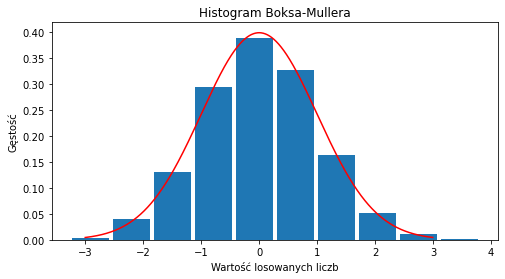

In [12]:
def zadanie_BoksaMullera(n, tytul="Histogram Boksa-Mullera", war_oczekiwana=0, odchyl_stand=1, alpha=0.05):
    pula_wartosci = np.array( [Gaussian_noise() for _ in range(n) ])
    for _ in range(n):
        pula_wartosci += war_oczekiwana

    W, p_value = scipy.stats.shapiro(pula_wartosci)
    print("\nWartość p_value: {}".format(p_value))
    if p_value > alpha:
        print("Jest to wartość większa niż {}, więc hipoteza zerowa została przyjęta, a ma ona postać 'Próba pochodzi z populacji o rozkładzie normalnym'.".format(alpha))
    else:
        print("Jest to wartość mniejsza niż {}, więc hipoteza zerowa nie została przyjęta, zatem próba nie pochodzi z populacji o rozkładzie normalnym".format(alpha))


    fig1, ax1 = plt.subplots(figsize=(8,4))
    ax1.set_title(tytul)
    ax1.set_xlabel("Wartość losowanych liczb")
    ax1.set_ylabel("Gęstość")

    x_linii = np.linspace(start=war_oczekiwana-3*odchyl_stand, stop=war_oczekiwana+3*odchyl_stand, num=1000, endpoint=False)
    y_linii = scipy.stats.norm.pdf(x_linii, war_oczekiwana, odchyl_stand)

    ax1.plot(x_linii, y_linii, 'r')
    ax1.hist(pula_wartosci, density=True, rwidth=0.9)
    fig1.show()




zadanie_BoksaMullera(5000)


#### Prezentacja wyników


N = 10

Wartość p_value: 0.8091262578964233
Jest to wartość większa niż 0.05, więc hipoteza zerowa została przyjęta, a ma ona postać 'Próba pochodzi z populacji o rozkładzie normalnym'.


<ipython-input-12-4d60694879ff>:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


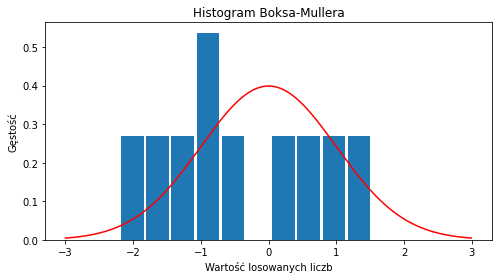

In [13]:
print("N = 10")
zadanie_BoksaMullera(10)

<ipython-input-12-4d60694879ff>:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


N = 100

Wartość p_value: 0.4796345829963684
Jest to wartość większa niż 0.05, więc hipoteza zerowa została przyjęta, a ma ona postać 'Próba pochodzi z populacji o rozkładzie normalnym'.


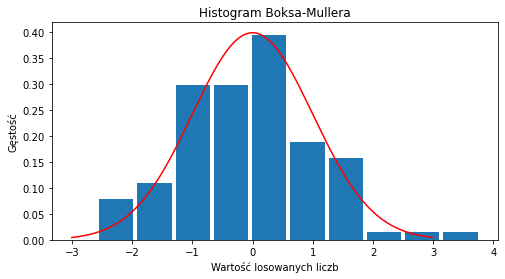

In [14]:
print("N = 100")
zadanie_BoksaMullera(100)

N = 5000

Wartość p_value: 0.1821812242269516
Jest to wartość większa niż 0.05, więc hipoteza zerowa została przyjęta, a ma ona postać 'Próba pochodzi z populacji o rozkładzie normalnym'.


<ipython-input-12-4d60694879ff>:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


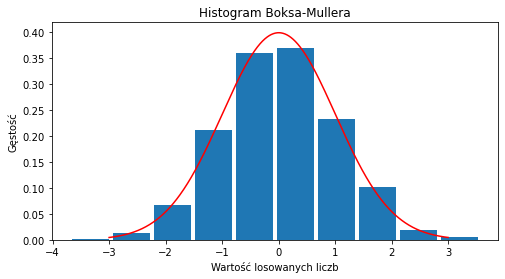

In [15]:
print("N = 5000")
zadanie_BoksaMullera(5000)

N = 100 000

Wartość p_value: 0.8977200388908386
Jest to wartość większa niż 0.05, więc hipoteza zerowa została przyjęta, a ma ona postać 'Próba pochodzi z populacji o rozkładzie normalnym'.


c:\users\wojciech\pythonsystemvirtualenvironment\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
<ipython-input-12-4d60694879ff>:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


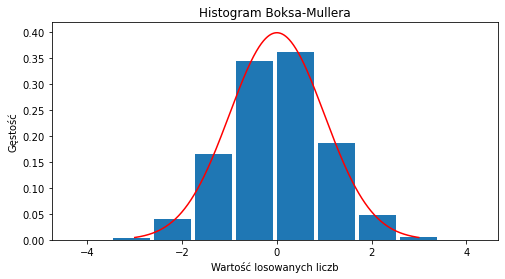

In [16]:
print("N = 100 000")
zadanie_BoksaMullera(100000)


Po obejrzeniu wyników dla $N=10, 100, 5000$ mogę stwierdzić, że:
- dla małych wartości $n$ nie jest się w stanie w pełni stwierdzić, czy rozkład jest normalny, czy też nie
- wraz ze zwiększaniem wartości $n$ dokładność rozkładu normalnego zwiększa się $=>$ wraz z $n => \infty$ utworzony histogram $=>$ idealnego rozkładu normalnego (dowodem na to jest zwiększający się współczynnik $p$).

#### Zadanie 3 - Metoda Monte Carlo

Napisz funkcję, która zwróci przybliżoną wartość liczby $\pi$ wykorzystującą metodę Monte Carlo do obliczenia pola powierzchni koła jednostkowego. Funkcja powinna przyjmować liczbę wylosowanych punktów jako parametr.
Zwizualizuj koło, zaznaczając jednym kolorem punkty, które trafiły do jego wnętrza, a drugim te, które trafiły na zewnątrz. Na wykresie zwizualizuj błąd bezwzględny wraz z rosnącą liczbą punktów.

Podobny projekt robiłem w wolnym czasie z okazji *Pi Day* :)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
<ipython-input-17-1095a712ed96>:41: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


Wartość uzyskanego pi : 3.1332


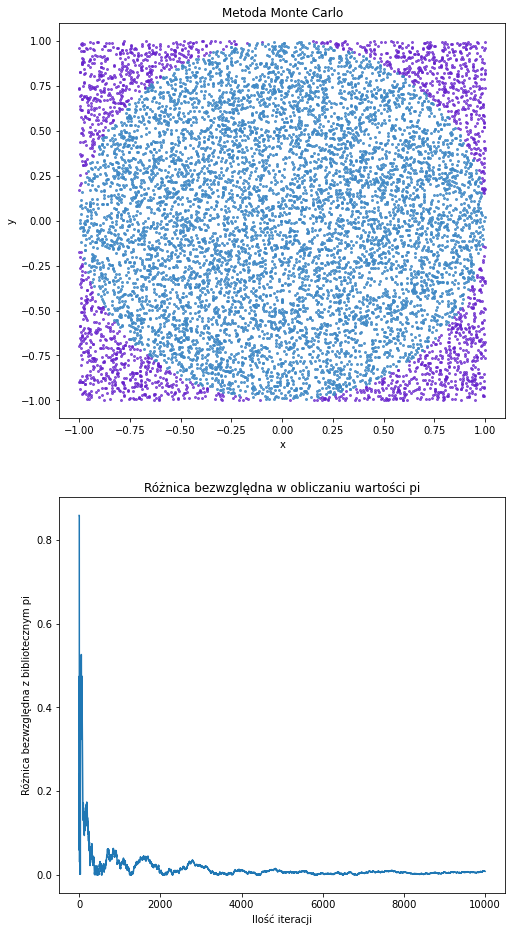

In [17]:
def licz_pi_metoda_MonteCarlo(n):
    punkty_trafione_x = []
    punkty_trafione_y = []
    punkty_nietrafione_x = []
    punkty_nietrafione_y = []

    licznik_trafione = 0
    licznik_nietrafione = 0
    moje_pi = np.float64(3)
    roznice_bezwzgledne = []

    for i in range(n):
        x = 2 * np.random.uniform() - 1.0
        y = 2 * np.random.uniform() - 1.0

        if x*x + y*y <= 1:
            licznik_trafione += 1
            punkty_trafione_x.append(x)
            punkty_trafione_y.append(y)
        else:
            licznik_nietrafione += 1
            punkty_nietrafione_x.append(x)
            punkty_nietrafione_y.append(y)

        moje_pi = 4 * licznik_trafione / (licznik_trafione + licznik_nietrafione)
        roznice_bezwzgledne.append( abs(moje_pi - np.pi) )

    fig1, ax1 = plt.subplots(2, figsize=(8,16))
    ax1[0].set_title("Metoda Monte Carlo")
    ax1[0].set_xlabel("x")
    ax1[0].set_ylabel("y")

    ax1[0].scatter(punkty_nietrafione_x, punkty_nietrafione_y, c=(102/255,34/255,204/255,0.7), s=4)
    ax1[0].scatter(punkty_trafione_x, punkty_trafione_y, c=(63/255, 136/255, 197/255, 0.8), s=4)

    ax1[1].set_title("Różnica bezwzględna w obliczaniu wartości pi")
    ax1[1].set_xlabel("Ilość iteracji")
    ax1[1].set_ylabel("Różnica bezwzględna z bibliotecznym pi")
    ax1[1].plot(roznice_bezwzgledne)
    print("Wartość uzyskanego pi : {}".format(moje_pi))
    fig1.show()

licz_pi_metoda_MonteCarlo(10000)

Jak widzimy, program odpowiednio rysuje "koło" jednostkowe w kwadracie 2x2.

Różnica bezwzględna znacząco maleje przy pierwszych iteracjach, a przy kilku tysięcy iteracji błędy wynikają z szumu i losowości zmiennych.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
<ipython-input-17-1095a712ed96>:41: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


Wartość uzyskanego pi : 3.1444


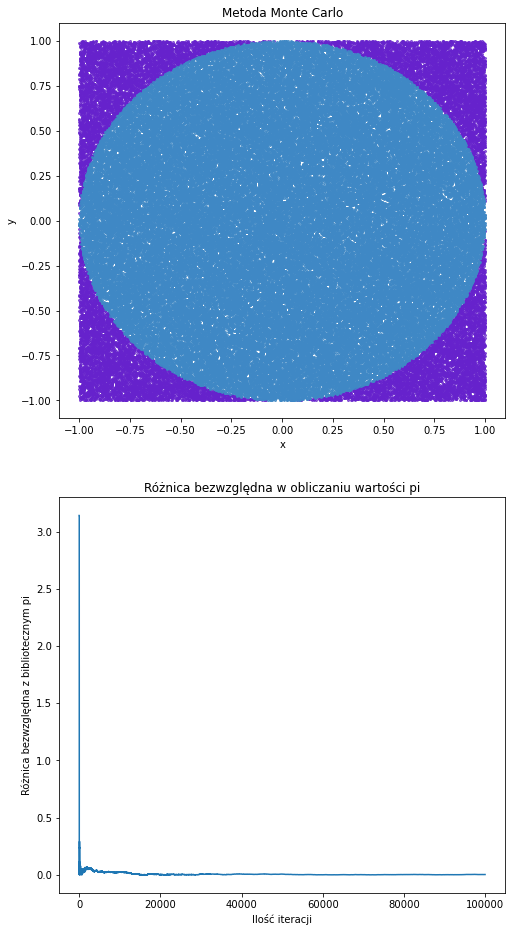

In [18]:
licz_pi_metoda_MonteCarlo(100000)

Pomimo 100000 iteracji wynik pi nie jest dokładny, a obliczenia nie są powtarzalne. 

Metoda ta,a by zwrócić idealny wynik potrzebowałaby idealnego generatora liczb losowych (np.random.uniform() nie da rady), a oprócz tego zbliżającej się do nieskończoności ilości iteracji.

Jest to jednak prosty sposób do przybliżenia wartości pi.